In [50]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import itertools
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score,confusion_matrix, accuracy_score

In [52]:
df=pd.read_csv("E:/CodeAlpha-intern(ML)/archive/bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [53]:
df.shape

(4521, 17)

In [54]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [58]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

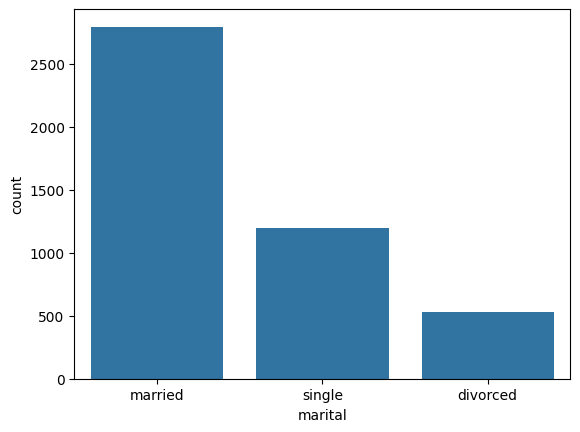

In [59]:
sns.countplot(x='marital',data=df)

<Axes: xlabel='housing', ylabel='count'>

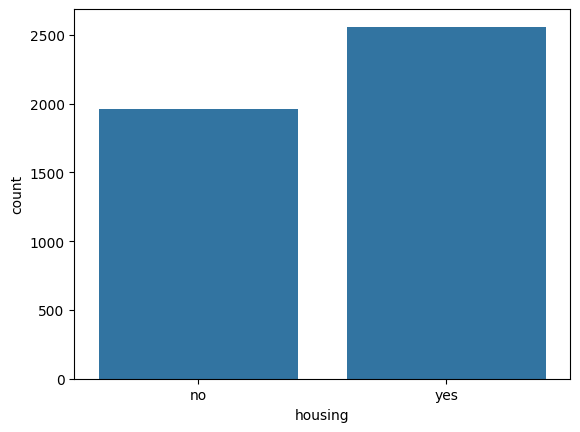

In [60]:
sns.countplot(x='housing',data=df)

In [61]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [62]:
target=df['y']
target[0:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [63]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [64]:
categories_1st=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
LE=LabelEncoder()
for i in categories_1st:
    df[i]=LE.fit_transform(df[i])

In [65]:
df.rename(columns={"y": "loan_approval"}, inplace=True)

In [66]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,loan_approval
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


In [67]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [68]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int32

In [69]:
print(x.shape, y.shape)

(4521, 16) (4521,)


In [70]:
print("Before oversampling:")
print(y.value_counts())
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)
print("After oversampling:")
print(y.value_counts())

Before oversampling:
loan_approval
0    4000
1     521
Name: count, dtype: int64
After oversampling:
loan_approval
0    4000
1    4000
Name: count, dtype: int64


In [71]:
#minmaxscaler
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.35294118, 0.63636364, 1.        , ..., 0.11238532, 0.08      ,
        0.66666667],
       [0.58823529, 0.54545455, 0.5       , ..., 0.10894495, 0.08      ,
        0.66666667],
       [0.72058824, 0.45454545, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [72]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7200, 16) (7200,)
Test set: (800, 16) (800,)


<h3>Using  Logistic Regression</h3>

In [73]:
LR = LogisticRegression(C=0.011, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [74]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [75]:
y_prob = LR.predict_proba(X_test)
y_prob

array([[0.75795745, 0.24204255],
       [0.68063576, 0.31936424],
       [0.34022158, 0.65977842],
       ...,
       [0.46606673, 0.53393327],
       [0.75407574, 0.24592426],
       [0.40625805, 0.59374195]])

In [76]:
LR_score=accuracy_score(y_test, y_pred)
LR_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%LR_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.6952
Accuracy: 0.696250


In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       351
           1       0.75      0.69      0.72       449

    accuracy                           0.70       800
   macro avg       0.69      0.70      0.69       800
weighted avg       0.70      0.70      0.70       800



Confusion matrix, without normalization
[[249 141]
 [102 308]]


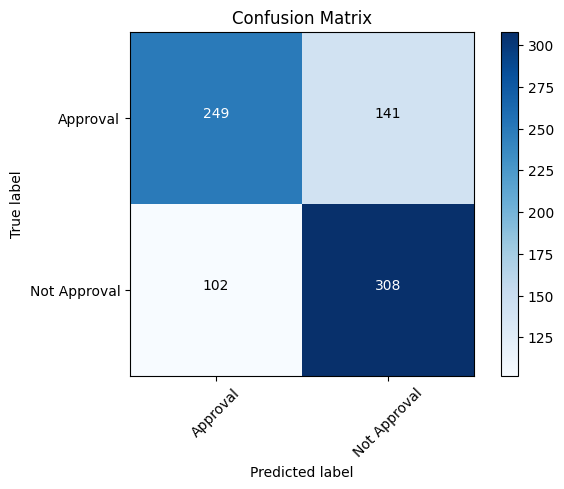

In [79]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

<h3>Using SVM</h3>

In [80]:
clf = svm.SVC(C=10, gamma =1,kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=10, gamma=1)

In [81]:
y_pred = clf.predict(X_test)
y_pred 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [82]:
SVM_score=accuracy_score(y_test, y_pred)
SVM_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%SVM_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.8973
Accuracy: 0.897500


In [83]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       362
           1       0.93      0.87      0.90       438

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



Confusion matrix, without normalization
[[335  55]
 [ 27 383]]


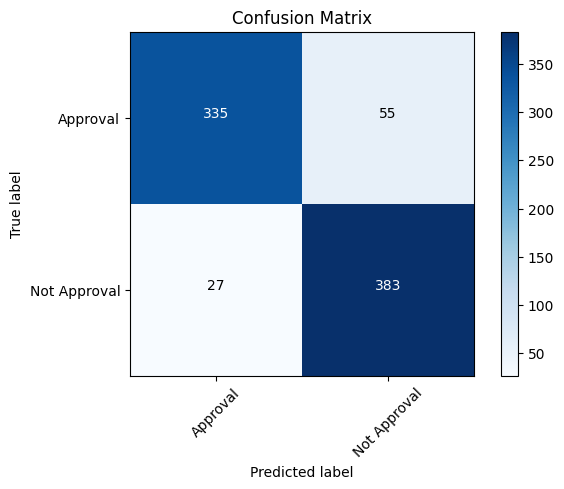

In [84]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

<h3>Using KNN </h3>

In [85]:
x_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
x_train_norm[0:5]

array([[ 0.60522104,  0.15597588,  1.33818802, -1.70609424, -0.12963617,
         8.87583714, -0.99280367, -0.37266621,  1.8276231 ,  0.14415345,
         0.19909197, -0.85456029, -0.58868227, -0.47941883, -0.41122885,
         0.52812961],
       [-0.65711717,  1.4055184 , -0.25121379, -0.35443507, -0.12963617,
        -0.53310695,  1.00724849, -0.37266621, -0.6092077 ,  1.59899027,
        -1.36582311, -0.79052321,  0.53064318, -0.47941883, -0.41122885,
         0.52812961],
       [-0.15218188, -0.15640975,  1.33818802,  0.9972241 , -0.12963617,
        -0.53310695,  1.00724849, -0.37266621, -0.6092077 ,  0.87157186,
        -0.73985708, -0.46451625, -0.21557379,  1.15121704,  2.73470459,
        -2.38643339],
       [-0.23633776,  1.4055184 , -0.25121379,  2.34888326, -0.12963617,
        -0.22741829, -0.99280367, -0.37266621,  1.8276231 ,  1.72022667,
         0.82505801,  1.27321726, -0.21557379, -0.47941883, -0.41122885,
         0.52812961],
       [-0.40464952, -0.78118101,  1

In [86]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [87]:
x_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)
x_test_norm[0:5]

array([[ 0.12947788, -1.14469476, -1.85920911, -1.71331424, -0.14285714,
        -0.5298626 ,  1.04344279, -0.36268681,  1.79980111, -0.86751157,
         0.8469117 , -0.80102433, -0.54061572, -0.48773651, -0.40024056,
         0.52010403],
       [-1.34038791,  1.30385018,  1.30877234, -0.35083771, -0.14285714,
        -0.28767525,  1.04344279, -0.36268681,  1.79980111,  1.3659193 ,
         0.8469117 ,  0.53867185,  0.17130622, -0.48773651, -0.40024056,
         0.52010403],
       [-0.30283559, -0.22649041,  1.30877234,  1.01163883, -0.14285714,
        -0.30528176, -0.95836592, -0.36268681, -0.60795957,  1.3659193 ,
         0.23265118, -0.24657024,  0.52726718,  0.91446517,  1.59162535,
        -1.48029609],
       [ 0.64825405, -0.22649041, -1.85920911,  1.01163883, -0.14285714,
        -0.25363599, -0.95836592, -0.36268681, -0.60795957,  1.71856628,
        -0.07447909,  2.32868609,  0.52726718, -0.48773651, -0.40024056,
         0.52010403],
       [ 1.25349291, -0.53255852, -1

In [88]:
y_pred = neigh.predict(x_test_norm)
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [89]:
knn_score=accuracy_score(y_test, y_pred)
kNN_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%kNN_F1_SCORE)
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

F1_score:0.9346
Test set Accuracy:  0.935


In [90]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       338
           1       1.00      0.89      0.94       462

    accuracy                           0.94       800
   macro avg       0.93      0.94      0.93       800
weighted avg       0.94      0.94      0.94       800



Confusion matrix, without normalization
[[338  52]
 [  0 410]]


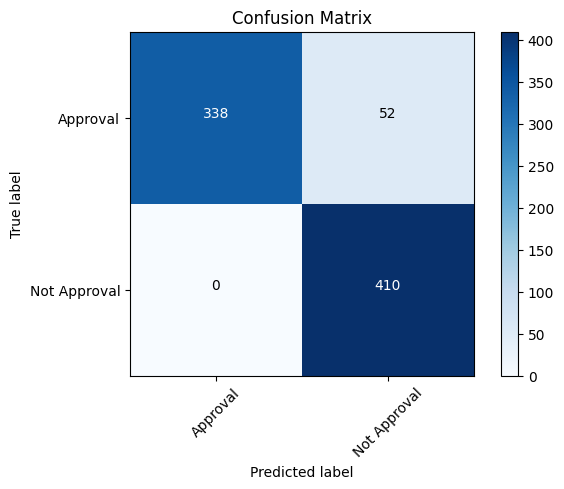

In [91]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

<H3> Random Forest Classifier</H3>

In [92]:
forest = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=200)

In [93]:
y_pred = forest.predict(X_test)

In [94]:
rand_score=accuracy_score(y_test, y_pred)
RAnd_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%RAnd_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.9800
Accuracy: 0.980000


In [95]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       374
           1       1.00      0.96      0.98       426

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



Confusion matrix, without normalization
[[374  16]
 [  0 410]]


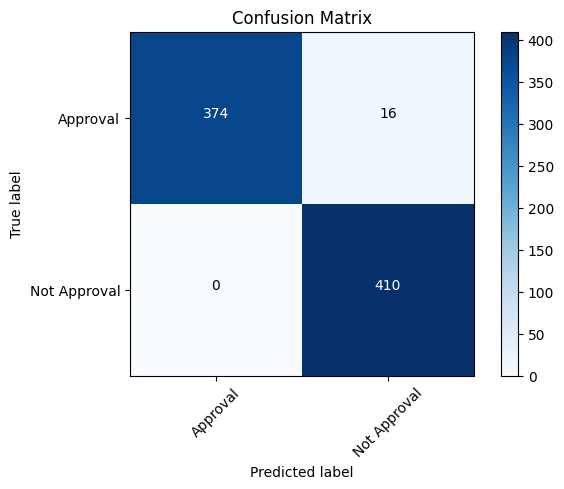

In [96]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

In [97]:
Accuracy=[LR_score*100,knn_score*100,SVM_score*100,round(rand_score*100)]
Algorithm=['logistic regression','SVM','KNN','Random forest']
f1_score=[LR_F1_SCORE*100,kNN_F1_SCORE*100,SVM_F1_SCORE*100,RAnd_F1_SCORE*100]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,logistic regression,69.625,69.515195
1,SVM,93.500,93.461664
2,KNN,89.750,89.728397
3,Random forest,98.000,97.998196


In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
225/225 [==============================] - 3s 4ms/step - loss: 0.6492 - accuracy: 0.6453 - val_loss: 0.6058 - val_accuracy: 0.6750
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7121 - val_loss: 0.5398 - val_accuracy: 0.7412
Epoch 3/50
225/225 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7646 - val_loss: 0.4952 - val_accuracy: 0.7775
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7937 - val_loss: 0.4834 - val_accuracy: 0.7950
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7922 - val_loss: 0.4811 - val_accuracy: 0.7975
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4661 - accuracy: 0.7940 - val_loss: 0.4775 - val_accuracy: 0.8025
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4631 - accuracy: 0.7979 - val_loss: 0.4765 - val_accuracy: 0.8012
Epoch 